In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
df_ofm = pd.read_csv('C:/Users/cqyzxy/Downloads/relaxed_structures_fingerprints/ofm_fingerprints.csv', sep=',')
df_ofm


,MOF,OFM: s^1 - s^1,OFM: s^1 - s^2,OFM: s^1 - p^1,OFM: s^1 - p^2,OFM: s^1 - p^3,OFM: s^1 - p^4,OFM: s^1 - p^5,OFM: s^1 - p^6,OFM: s^1 - d^1,...,OFM: period 7 - f^12,OFM: period 7 - f^13,OFM: period 7 - f^14,OFM: period 7 - period 1,OFM: period 7 - period 2,OFM: period 7 - period 3,OFM: period 7 - period 4,OFM: period 7 - period 5,OFM: period 7 - period 6,OFM: period 7 - period 7
0,qmof-0000295,0.223047,0.332186,0.0,0.209774,0.060009,0.056113,0.000000,0.006290,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,qmof-00019ff,0.087862,0.237401,0.0,0.192361,0.011615,0.020126,0.013176,0.000123,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,qmof-0001b0d,0.100316,0.237686,0.0,0.210023,0.001645,0.025161,0.000000,0.000857,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,qmof-0003ae4,0.050872,0.314352,0.0,0.079292,0.000000,0.235060,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,qmof-000512e,0.000733,0.085154,0.0,0.003905,0.004421,0.076828,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20369,qmof-fff0df1,0.181779,0.293623,0.0,0.221468,0.016555,0.052176,0.000000,0.003425,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20370,qmof-fff4e91,0.136050,0.223271,0.0,0.198331,0.000000,0.024940,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20371,qmof-fffa2d9,0.057634,0.243963,0.0,0.073384,0.000000,0.122300,0.047825,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20372,qmof-fffd0e2,0.090614,0.206402,0.0,0.177845,0.006249,0.000000,0.020183,0.002125,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_train = pd.read_csv('../../data/datasets_main/train_hse06.csv', sep=',')
df_train


,inputs.hse06.theory,outputs.hse06.bandgap,info.mofid.smiles_nodes,info.mofid.smiles_linkers,info.mofid.smiles,info.natoms,info.pld,info.lcd,info.density,info.volume,qmof_id
0,HSE06,4.988289,['[Zn]'],"['[O-]C(=O)C', 'n1ccc(cc1)C1C(c2ccncc2)C(C1c1c...",[O-]C(=O)C.[Zn].n1ccc(cc1)C1C(c2ccncc2)C(C1c1c...,78,1.37489,2.13029,1.693758,822.916880,qmof-755b963
1,HSE06,3.196302,['[Zn]'],['c1ncn(c1)Cc1ccc(cc1)Cn1cncc1'],[Zn].c1ncn(c1)Cc1ccc(cc1)Cn1cncc1,134,1.20752,2.66721,1.453964,1409.227968,qmof-431c61c
2,HSE06,3.617418,['[OH2][Pr][OH2]'],['[O-]C(=O)c1cc(c(cc1C(=O)c1ccccc1)C(=O)[O-])C...,[O-]C(=O)c1cc(c(cc1C(=O)c1ccccc1)C(=O)[O-])C(=...,134,1.20601,2.81754,1.683856,1450.490082,qmof-0954b37
3,HSE06,3.220291,['Cl[Cu]Cl'],['Fc1c(F)c(Sc2ccccn2)c(c(c1Sc1ccccn1)F)F'],Cl[Cu]Cl.Fc1c(F)c(Sc2ccccn2)c(c(c1Sc1ccccn1)F)F,35,3.04146,3.91264,1.469086,568.352244,qmof-6994eb7
4,HSE06,2.436139,['[Ag]'],['n1ccc(cc1)c1ccncc1'],[Ag].n1ccc(cc1)c1ccncc1,104,1.22817,2.05442,1.729977,935.476068,qmof-1eea8fc
...,...,...,...,...,...,...,...,...,...,...,...
8643,HSE06,3.605205,"['[Fe]', '[Ni]']",['[C]#N'],[C]#N.[Fe].[Ni],36,0.75723,1.76057,1.851188,364.937932,qmof-46a3716
8644,HSE06,3.776886,['[Cu]'],['[O]P(=O)(c1cccc(c1)P(=O)(O)[O])O'],[Cu].[O]P(=O)(c1cccc(c1)P(=O)(O)[O])O,86,0.84395,2.34244,1.839557,866.228574,qmof-b2fb769
8645,HSE06,3.880014,['[Mn]'],['[N][N][N]'],[Mn].[N][N][N],70,0.83223,1.52142,1.814356,752.692981,qmof-4a920a2
8646,HSE06,4.301264,['[OH2][Ca][OH2]'],['CCc1[nH]c(c(n1)C(=O)O)C(=O)[O-]'],CCc1[nH]c(c(n1)C(=O)O)C(=O)[O-].[OH2][Ca][OH2],94,1.34620,2.28803,1.639434,896.172985,qmof-0f4d4bb


In [8]:
# Merge the DataFrames on the matching columns
df_train_ofm = pd.merge(df_ofm, df_train, left_on='MOF', right_on='qmof_id', how='right')
df_train_ofm

,MOF,OFM: s^1 - s^1,OFM: s^1 - s^2,OFM: s^1 - p^1,OFM: s^1 - p^2,OFM: s^1 - p^3,OFM: s^1 - p^4,OFM: s^1 - p^5,OFM: s^1 - p^6,OFM: s^1 - d^1,...,outputs.hse06.bandgap,info.mofid.smiles_nodes,info.mofid.smiles_linkers,info.mofid.smiles,info.natoms,info.pld,info.lcd,info.density,info.volume,qmof_id
0,qmof-755b963,0.093544,0.231142,0.0,0.174859,0.004269,0.027510,0.023885,0.000619,0.0,...,4.988289,['[Zn]'],"['[O-]C(=O)C', 'n1ccc(cc1)C1C(c2ccncc2)C(C1c1c...",[O-]C(=O)C.[Zn].n1ccc(cc1)C1C(c2ccncc2)C(C1c1c...,78,1.37489,2.13029,1.693758,822.916880,qmof-755b963
1,qmof-431c61c,0.097665,0.250352,0.0,0.192272,0.018228,0.039189,0.000000,0.000664,0.0,...,3.196302,['[Zn]'],['c1ncn(c1)Cc1ccc(cc1)Cn1cncc1'],[Zn].c1ncn(c1)Cc1ccc(cc1)Cn1cncc1,134,1.20752,2.66721,1.453964,1409.227968,qmof-431c61c
2,qmof-0954b37,0.079280,0.225983,0.0,0.158408,0.000000,0.067257,0.000000,0.000317,0.0,...,3.617418,['[OH2][Pr][OH2]'],['[O-]C(=O)c1cc(c(cc1C(=O)c1ccccc1)C(=O)[O-])C...,[O-]C(=O)c1cc(c(cc1C(=O)c1ccccc1)C(=O)[O-])C(=...,134,1.20601,2.81754,1.683856,1450.490082,qmof-0954b37
3,qmof-6994eb7,0.040307,0.205369,0.0,0.124490,0.012365,0.012152,0.053073,0.003290,0.0,...,3.220291,['Cl[Cu]Cl'],['Fc1c(F)c(Sc2ccccn2)c(c(c1Sc1ccccn1)F)F'],Cl[Cu]Cl.Fc1c(F)c(Sc2ccccn2)c(c(c1Sc1ccccn1)F)F,35,3.04146,3.91264,1.469086,568.352244,qmof-6994eb7
4,qmof-1eea8fc,0.180863,0.285742,0.0,0.226013,0.010677,0.045445,0.000000,0.003607,0.0,...,2.436139,['[Ag]'],['n1ccc(cc1)c1ccncc1'],[Ag].n1ccc(cc1)c1ccncc1,104,1.22817,2.05442,1.729977,935.476068,qmof-1eea8fc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,qmof-46a3716,0.094273,0.224683,0.0,0.133746,0.086741,0.000000,0.000000,0.004196,0.0,...,3.605205,"['[Fe]', '[Ni]']",['[C]#N'],[C]#N.[Fe].[Ni],36,0.75723,1.76057,1.851188,364.937932,qmof-46a3716
8644,qmof-b2fb769,0.075643,0.255650,0.0,0.157866,0.012736,0.083658,0.000000,0.001389,0.0,...,3.776886,['[Cu]'],['[O]P(=O)(c1cccc(c1)P(=O)(O)[O])O'],[Cu].[O]P(=O)(c1cccc(c1)P(=O)(O)[O])O,86,0.84395,2.34244,1.839557,866.228574,qmof-b2fb769
8645,qmof-4a920a2,0.016680,0.192066,0.0,0.115472,0.076454,0.000000,0.000000,0.000140,0.0,...,3.880014,['[Mn]'],['[N][N][N]'],[Mn].[N][N][N],70,0.83223,1.52142,1.814356,752.692981,qmof-4a920a2
8646,qmof-0f4d4bb,0.113395,0.291098,0.0,0.127221,0.030988,0.132596,0.000000,0.000000,0.0,...,4.301264,['[OH2][Ca][OH2]'],['CCc1[nH]c(c(n1)C(=O)O)C(=O)[O-]'],CCc1[nH]c(c(n1)C(=O)O)C(=O)[O-].[OH2][Ca][OH2],94,1.34620,2.28803,1.639434,896.172985,qmof-0f4d4bb


In [9]:

threshold = len(df_train_ofm) / 2

# Drop columns where the count of zeros is greater than half of the total rows
df_filtered = df_train_ofm.loc[:, (df_train_ofm != 0).sum(axis=0) > threshold]

df_filtered.to_csv("filtered_file.csv", index=False)


In [10]:
df_filtered


,MOF,OFM: s^1 - s^1,OFM: s^1 - s^2,OFM: s^1 - p^2,OFM: s^1 - p^3,OFM: s^1 - p^4,OFM: s^1 - p^6,OFM: s^1 - d^10,OFM: s^1 - period 1,OFM: s^1 - period 2,...,outputs.hse06.bandgap,info.mofid.smiles_nodes,info.mofid.smiles_linkers,info.mofid.smiles,info.natoms,info.pld,info.lcd,info.density,info.volume,qmof_id
0,qmof-755b963,0.093544,0.231142,0.174859,0.004269,0.027510,0.000619,0.000619,0.093544,0.230523,...,4.988289,['[Zn]'],"['[O-]C(=O)C', 'n1ccc(cc1)C1C(c2ccncc2)C(C1c1c...",[O-]C(=O)C.[Zn].n1ccc(cc1)C1C(c2ccncc2)C(C1c1c...,78,1.37489,2.13029,1.693758,822.916880,qmof-755b963
1,qmof-431c61c,0.097665,0.250352,0.192272,0.018228,0.039189,0.000664,0.000664,0.097665,0.249689,...,3.196302,['[Zn]'],['c1ncn(c1)Cc1ccc(cc1)Cn1cncc1'],[Zn].c1ncn(c1)Cc1ccc(cc1)Cn1cncc1,134,1.20752,2.66721,1.453964,1409.227968,qmof-431c61c
2,qmof-0954b37,0.079280,0.225983,0.158408,0.000000,0.067257,0.000317,0.000317,0.079280,0.225666,...,3.617418,['[OH2][Pr][OH2]'],['[O-]C(=O)c1cc(c(cc1C(=O)c1ccccc1)C(=O)[O-])C...,[O-]C(=O)c1cc(c(cc1C(=O)c1ccccc1)C(=O)[O-])C(=...,134,1.20601,2.81754,1.683856,1450.490082,qmof-0954b37
3,qmof-6994eb7,0.040307,0.205369,0.124490,0.012365,0.012152,0.003290,0.003290,0.037017,0.150956,...,3.220291,['Cl[Cu]Cl'],['Fc1c(F)c(Sc2ccccn2)c(c(c1Sc1ccccn1)F)F'],Cl[Cu]Cl.Fc1c(F)c(Sc2ccccn2)c(c(c1Sc1ccccn1)F)F,35,3.04146,3.91264,1.469086,568.352244,qmof-6994eb7
4,qmof-1eea8fc,0.180863,0.285742,0.226013,0.010677,0.045445,0.003607,0.003607,0.177256,0.282135,...,2.436139,['[Ag]'],['n1ccc(cc1)c1ccncc1'],[Ag].n1ccc(cc1)c1ccncc1,104,1.22817,2.05442,1.729977,935.476068,qmof-1eea8fc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,qmof-46a3716,0.094273,0.224683,0.133746,0.086741,0.000000,0.004196,0.000000,0.094273,0.220487,...,3.605205,"['[Fe]', '[Ni]']",['[C]#N'],[C]#N.[Fe].[Ni],36,0.75723,1.76057,1.851188,364.937932,qmof-46a3716
8644,qmof-b2fb769,0.075643,0.255650,0.157866,0.012736,0.083658,0.001389,0.001389,0.074254,0.252528,...,3.776886,['[Cu]'],['[O]P(=O)(c1cccc(c1)P(=O)(O)[O])O'],[Cu].[O]P(=O)(c1cccc(c1)P(=O)(O)[O])O,86,0.84395,2.34244,1.839557,866.228574,qmof-b2fb769
8645,qmof-4a920a2,0.016680,0.192066,0.115472,0.076454,0.000000,0.000140,0.000000,0.016680,0.191926,...,3.880014,['[Mn]'],['[N][N][N]'],[Mn].[N][N][N],70,0.83223,1.52142,1.814356,752.692981,qmof-4a920a2
8646,qmof-0f4d4bb,0.113395,0.291098,0.127221,0.030988,0.132596,0.000000,0.000000,0.113395,0.290805,...,4.301264,['[OH2][Ca][OH2]'],['CCc1[nH]c(c(n1)C(=O)O)C(=O)[O-]'],CCc1[nH]c(c(n1)C(=O)O)C(=O)[O-].[OH2][Ca][OH2],94,1.34620,2.28803,1.639434,896.172985,qmof-0f4d4bb


In [11]:
df_numerical = df_filtered.select_dtypes(include=[np.number])
df_numerical


,OFM: s^1 - s^1,OFM: s^1 - s^2,OFM: s^1 - p^2,OFM: s^1 - p^3,OFM: s^1 - p^4,OFM: s^1 - p^6,OFM: s^1 - d^10,OFM: s^1 - period 1,OFM: s^1 - period 2,OFM: s^1 - period 4,...,OFM: period 4 - s^1,OFM: period 4 - s^2,OFM: period 4 - period 1,OFM: period 4 - period 2,outputs.hse06.bandgap,info.natoms,info.pld,info.lcd,info.density,info.volume
0,0.093544,0.231142,0.174859,0.004269,0.027510,0.000619,0.000619,0.093544,0.230523,0.000619,...,0.000374,0.020829,0.000374,0.020829,4.988289,78,1.37489,2.13029,1.693758,822.916880
1,0.097665,0.250352,0.192272,0.018228,0.039189,0.000664,0.000664,0.097665,0.249689,0.000664,...,0.000467,0.012397,0.000467,0.012397,3.196302,134,1.20752,2.66721,1.453964,1409.227968
2,0.079280,0.225983,0.158408,0.000000,0.067257,0.000317,0.000317,0.079280,0.225666,0.000000,...,0.000000,0.000000,0.000000,0.000000,3.617418,134,1.20601,2.81754,1.683856,1450.490082
3,0.040307,0.205369,0.124490,0.012365,0.012152,0.003290,0.003290,0.037017,0.150956,0.003290,...,0.001962,0.025658,0.001962,0.009503,3.220291,35,3.04146,3.91264,1.469086,568.352244
4,0.180863,0.285742,0.226013,0.010677,0.045445,0.003607,0.003607,0.177256,0.282135,0.000000,...,0.000000,0.000000,0.000000,0.000000,2.436139,104,1.22817,2.05442,1.729977,935.476068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,0.094273,0.224683,0.133746,0.086741,0.000000,0.004196,0.000000,0.094273,0.220487,0.004196,...,0.002591,0.044658,0.002591,0.044658,3.605205,36,0.75723,1.76057,1.851188,364.937932
8644,0.075643,0.255650,0.157866,0.012736,0.083658,0.001389,0.001389,0.074254,0.252528,0.001389,...,0.000884,0.020607,0.000884,0.020607,3.776886,86,0.84395,2.34244,1.839557,866.228574
8645,0.016680,0.192066,0.115472,0.076454,0.000000,0.000140,0.000000,0.016680,0.191926,0.000140,...,0.000071,0.021533,0.000071,0.021533,3.880014,70,0.83223,1.52142,1.814356,752.692981
8646,0.113395,0.291098,0.127221,0.030988,0.132596,0.000000,0.000000,0.113395,0.290805,0.000293,...,0.000140,0.015153,0.000140,0.015153,4.301264,94,1.34620,2.28803,1.639434,896.172985


Explained Variance Ratio: [2.10512823e-01 1.92817785e-01 1.44069530e-01 9.83641049e-02
 5.94805187e-02 4.26240755e-02 3.39257798e-02 2.65153567e-02
 2.45372034e-02 2.24138071e-02 2.05887424e-02 1.52712690e-02
 1.40807276e-02 1.33777732e-02 1.08202597e-02 1.03572655e-02
 8.73564922e-03 8.32186729e-03 6.65888966e-03 6.07263236e-03
 5.39630309e-03 4.30929884e-03 2.49941391e-03 2.33689117e-03
 2.16899398e-03 1.97544459e-03 1.75010290e-03 1.53472836e-03
 1.08843718e-03 9.97002278e-04 8.60555420e-04 7.06190758e-04
 6.52046095e-04 5.07315952e-04 4.09110644e-04 3.78811743e-04
 3.40784766e-04 2.81367055e-04 2.76530562e-04 2.51963598e-04
 2.17440545e-04 1.94015341e-04 1.78862637e-04 1.68232751e-04
 1.43284688e-04 1.16774446e-04 1.08232079e-04 8.88516010e-05
 6.42018752e-05 5.94605430e-05 5.23343156e-05 4.02069033e-05
 3.42438982e-05 3.32572657e-05 2.71282682e-05 2.45678906e-05
 2.36135743e-05 2.04359742e-05 1.82849369e-05 1.70382559e-05
 1.57951977e-05 1.32766350e-05 9.85652775e-06 8.19153796e-0

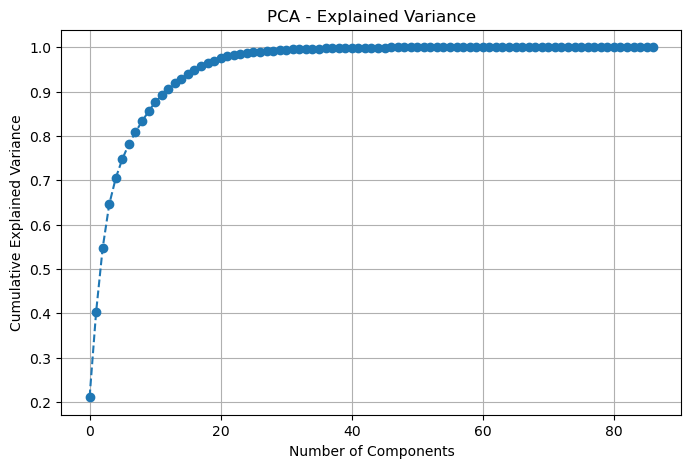

In [ ]:
# PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
data_filled = pd.DataFrame(imputer.fit_transform(df_numerical), columns=df_numerical.columns)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_filled)
pca = PCA()
pca.fit(scaled_data)

# Explained variance ratio (importance of each component)
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance)

# Plot cumulative variance to decide number of components to keep
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(explained_variance), marker='o', linestyle='--')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA - Explained Variance")
plt.grid()

# Get feature importance based on PCA loadings
feature_importance = pd.DataFrame(
    np.abs(pca.components_), columns=df_numerical.columns
).T
feature_importance.columns = [f'PC{i+1}' for i in range(len(df_numerical.columns))]
print("\nFeature Importance based on PCA:\n", feature_importance)

# Select important features (e.g., features with high loadings in first few PCs)
top_features = feature_importance.abs().sum(axis=1).sort_values(ascending=False)
print("\nSelected Features:\n", top_features.head(10))


In [13]:
top_features.head(20)

OFM: p^4 - d^10             7.386651
OFM: period 2 - s^1         7.353820
OFM: s^2 - p^6              7.344549
OFM: p^4 - s^1              7.263399
OFM: s^1 - s^2              7.202158
OFM: s^2 - period 1         7.181580
OFM: period 2 - d^10        7.178710
OFM: s^2 - s^1              7.165114
OFM: period 2 - period 1    7.140719
OFM: d^10 - p^4             7.116627
OFM: p^2 - p^2              7.086998
OFM: p^4 - p^6              7.076349
OFM: s^1 - period 2         7.063150
OFM: p^2 - p^4              7.033859
OFM: s^1 - p^4              7.019040
OFM: period 2 - p^4         7.016826
OFM: p^2 - s^1              7.015850
OFM: p^4 - p^2              7.004773
OFM: period 1 - period 2    6.999299
OFM: p^6 - period 2         6.975463
dtype: float64